In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
m = 40
n = 30

In [6]:
k = int((m + n) / 4)
X, Y = np.meshgrid(np.linspace(-3, 3, k), np.linspace(-3, 3, k))
g2d = np.exp(0 - (X **2 + Y **2) / (k / 8))
#print(X)
#print(Y)
print(X.shape, Y.shape)
print(g2d)

(17, 17) (17, 17)
[[2.09541607e-04 5.65420319e-04 1.33657212e-03 2.76779063e-03
  5.02104275e-03 7.97947744e-03 1.11089965e-02 1.35486199e-02
  1.44755521e-02 1.35486199e-02 1.11089965e-02 7.97947744e-03
  5.02104275e-03 2.76779063e-03 1.33657212e-03 5.65420319e-04
  2.09541607e-04]
 [5.65420319e-04 1.52571196e-03 3.60656314e-03 7.46851703e-03
  1.35486199e-02 2.15315647e-02 2.99761582e-02 3.65591592e-02
  3.90603631e-02 3.65591592e-02 2.99761582e-02 2.15315647e-02
  1.35486199e-02 7.46851703e-03 3.60656314e-03 1.52571196e-03
  5.65420319e-04]
 [1.33657212e-03 3.60656314e-03 8.52539534e-03 1.76544976e-02
  3.20269844e-02 5.08975151e-02 7.08593166e-02 8.64205822e-02
  9.23330674e-02 8.64205822e-02 7.08593166e-02 5.08975151e-02
  3.20269844e-02 1.76544976e-02 8.52539534e-03 3.60656314e-03
  1.33657212e-03]
 [2.76779063e-03 7.46851703e-03 1.76544976e-02 3.65591592e-02
  6.63218884e-02 1.05399225e-01 1.46736378e-01 1.78960846e-01
  1.91204496e-01 1.78960846e-01 1.46736378e-01 1.05399225e-0

In [8]:
from scipy.signal import convolve2d
A = convolve2d(np.random.randn(m,n), g2d, mode='same')

In [9]:
U,s,Vt = np.linalg.svd(A)
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)

Text(0.5, 1.0, 'Vt')

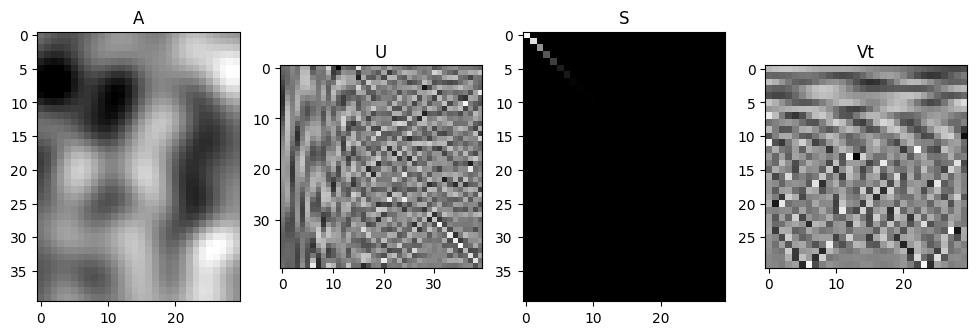

In [10]:
_,axs = plt.subplots(1,4,figsize=(12,6))

axs[0].imshow(A, aspect='equal', cmap='gray', vmin=-10,vmax=10)
axs[0].set_title('A')

axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title('U')

axs[2].imshow(S, aspect='equal', cmap='gray')
axs[2].set_title('S')

axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title('Vt')

Text(0.5, 1.0, 'Scree plot')

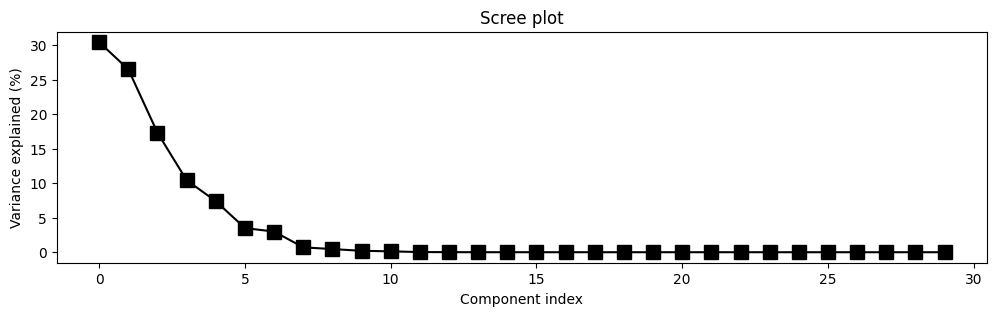

In [11]:
plt.figure(figsize=(12,3))
plt.plot(100*s/np.sum(s),'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Variance explained (%)')
plt.title('Scree plot')

In [12]:
numLayers = 4
rank1mats = np.zeros((numLayers,m,n))

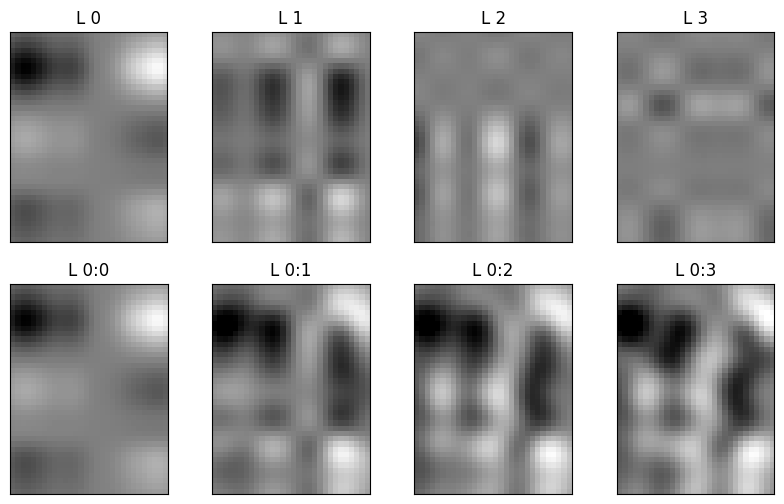

In [13]:
_,axs = plt.subplots(2,numLayers,figsize=(10,6))

# the loop
for i in range(numLayers):
    
    # create this layer
    rank1mats[i,:,:] = np.outer(U[:,i],Vt[i,:])*S[i,i]
    
    # show this layer
    axs[0,i].imshow(rank1mats[i,:,:],cmap='gray', vmin=-10,vmax=10)
    axs[0,i].set_title(f'L {i}')
    axs[0,i].set_xticks([]), axs[0,i].set_yticks([])

    # show the cumulative sum of layers
    axs[1,i].imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray', vmin=-10,vmax=10)
    axs[1,i].set_title(f'L 0:{i}')
    axs[1,i].set_xticks([]), axs[1,i].set_yticks([])